# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Artech House, 2020
<br/>

# Probability of Detection with Gaussian Noise
***

Referring to Section 6.1.2, to calculate the probability of false alarm for the Gaussian noise and given detection threshold, start with (Equation 6.7) and make use of (Equation 6.1) to give (Equation 6.8)

$$
    P_{{fa}} = \int\limits_{R(\lambda)} p(y|H_0)\, dy = \int\limits_{V_t}^\infty  \frac{1}{\sigma \sqrt{2\pi}}\, \exp\left(-\dfrac{y^2}{2\sigma^2}\right) \, dy.
$$

The integral in (Equation 6.8) above may be found in various look-up tables and online calculators, and is given here as (Equation 6.9)

$$
    P_{{fa}} = \frac{1}{2}\left[1 - {erf}\left( \frac{V_T}{\sqrt{2}\sigma} \right)\right],
$$

where ${erf}$ is the ***error function***.  The error function may be calculated using the SciPy implementation given in ***scipy.special.erf()***. A similar derivation for the probability of detection is followed.  Assume the amplitude of the signal from the envelope detector is $A$, which allows the probability of detection to be written as (Equation 6.10)

$$
	P_d = \int\limits_{R(\lambda)} p(y|H1)\, dy = \int\limits_{V_T}^\infty \frac{1}{\sigma \sqrt{2 \pi}} \exp\left(\frac{-(y - A)^2}{2\sigma^2}\right)\, dy.
$$

Performing the integration leads to (Equation 6.11)

$$
    P_d = \frac{1}{2}\left[1 - {erf}\left( \frac{V_T - A}{\sqrt{2}\sigma} \right)\right].
$$
***

Begin by getting the library path

In [1]:
import lib_path

Set the start and end signal to noise ratio (dB) and create an array ov values using `linspace` from `scipy`

In [2]:
from scipy import linspace

snr_start = 1.0

snr_end = 20.0

snr = 10.0 ** (linspace(snr_start, snr_end, 200) / 10.0)

Set the probability of false alarm

In [3]:
pfa = 1e-6

Calculate the probability of detection for gaussian noise

In [4]:
from Libs.detection.single_pulse import pd_gaussian

pd = pd_gaussian(snr, pfa)

Display the probability of detection for gaussian noise using the `matplotlib` routines

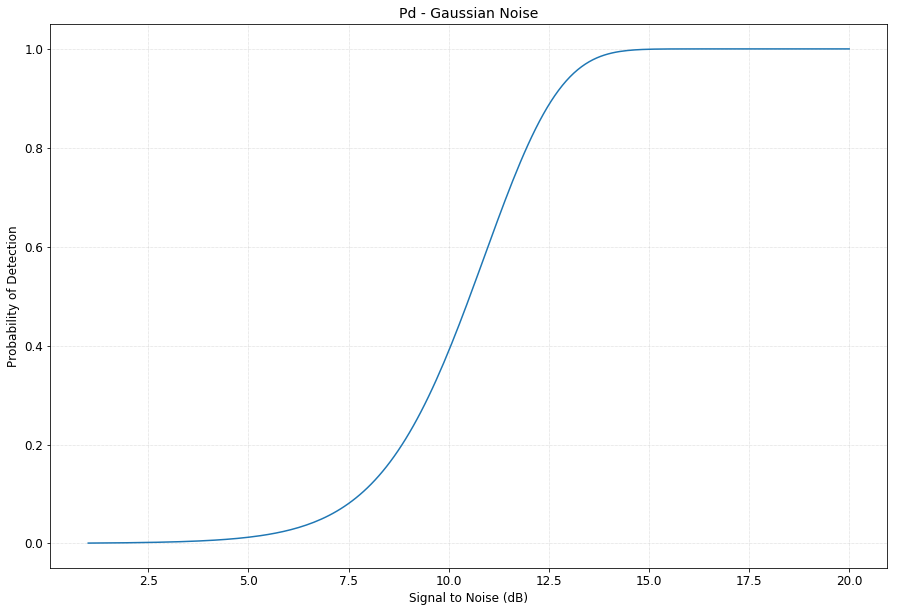

In [6]:
from matplotlib import pyplot as plt

from scipy import log10


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)


# Display the results

plt.plot(10.0 * log10(snr), pd, '')

        
# Set the plot title and labels

plt.title('Pd - Gaussian Noise', size=14)

plt.xlabel('Signal to Noise (dB)', size=12)

plt.ylabel('Probability of Detection', size=12)
        

# Set the tick label size
plt.tick_params(labelsize=12)
        

# Turn on the grid
plt.grid(linestyle=':', linewidth=0.5)